In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def relu(X):
	return np.maximum(X, 0)


def relu_derivative(X):
	return 1. * (X > 0)


class Perceptron():

    def __init__(self, input_size,  output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.rand(input_size, output_size)
        self.bias = np.random.rand(output_size)
        self.learning_rate = 0.001

    def forward(self, X):
        self.X = X
        self.Z = np.dot(X, self.weights) + self.bias
        self.A = relu(self.Z)
        return self.A
    
    def backward(self, dA):
        dZ = dA * relu_derivative(self.Z)
        dW = np.dot(self.X.T, dZ)
        db = np.sum(dZ, axis=0)
        dX = np.dot(dZ, self.weights.T)
        self.weights -= self.learning_rate * dW
        self.bias -= self.learning_rate * db
        return dX
    
    def train(self, X, y, epochs):
        self.loss = []
        for i in range(epochs):
            A = self.forward(X)
            loss = np.sum((A - y) ** 2)
            dA = 2 * (A - y)
            self.backward(dA)
            self.loss.append(loss)

In [3]:
X = np.random.rand(100, 2)
y = np.zeros((100, 1))
y[X[:, 0] > X[:, 1]] = 1

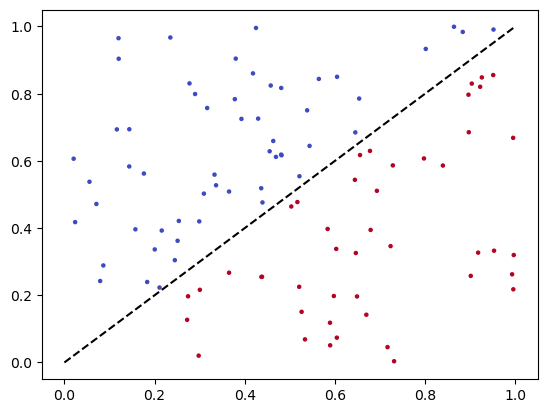

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='coolwarm', s=5)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

In [5]:
model = Perceptron(2, 1)
model.train(X, y, 3000)

[]

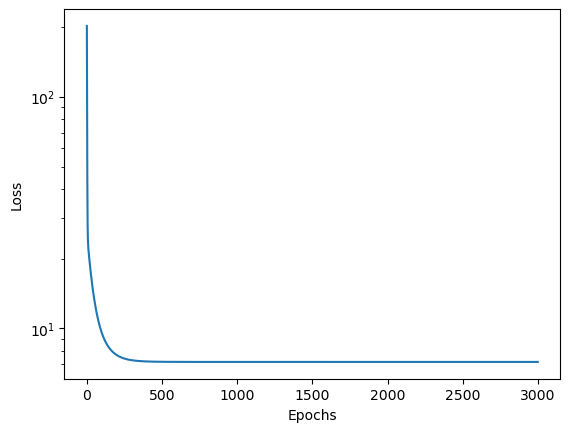

In [6]:
plt.plot(model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.semilogy()

In [7]:
y_pred = model.forward(X)

In [8]:
# Plot the decision boundary
xx = np.linspace(0, 1, 500)
yy = np.linspace(0, 1, 500)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.zeros(XX.shape)
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        ZZ[i, j] = model.forward(np.array([[XX[i, j], YY[i, j]]]))

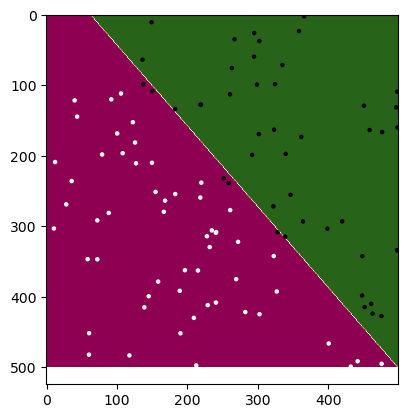

In [9]:
fig, ax = plt.subplots()
ax.imshow(ZZ>0.5, cmap='PiYG')
ax.scatter(500* X[:, 0], 500 * X[:, 1], c=y[:, 0], cmap='bone_r', s=5)


In [10]:
X = np.random.rand(500, 2)
y = np.zeros((500, 1))

# Make the classication problem a bit harder
y[X[:, 0] > 0.5] = 1
y[X[:, 1] > 0.5] = 1

In [11]:
model = Perceptron(2, 1)
model.train(X, y, 3000)

[]

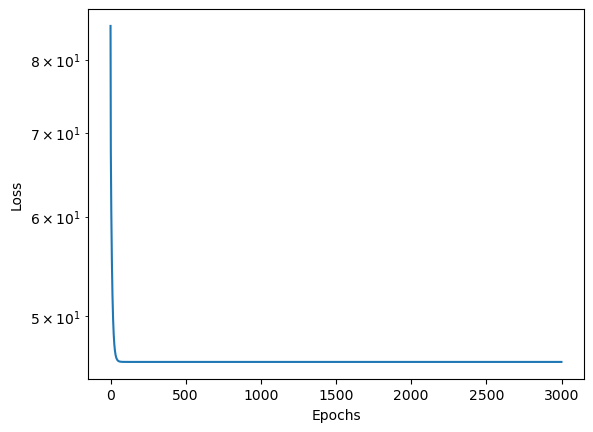

In [12]:
plt.plot(model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.semilogy()

In [13]:
# Plot the decision boundary
xx = np.linspace(0, 1, 500)
yy = np.linspace(0, 1, 500)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.zeros(XX.shape)
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        ZZ[i, j] = model.forward(np.array([[XX[i, j], YY[i, j]]]))

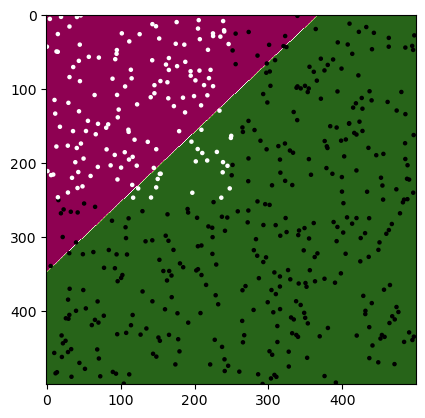

In [14]:
fig, ax = plt.subplots()
ax.imshow(ZZ>0.5, cmap='PiYG')
ax.scatter(500* X[:, 0], 500 * X[:, 1], c=y[:, 0], cmap='bone_r', s=5)

